![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.

#  Andres Sanche | marketing_customer_analysis

_Un equipo quiere entender y predecir el comportamiento de los clientes. Para hacerlo, tienen información sobre los clientes, como su edad, género y comportamiento de compra. Quieren utilizar esta información para crear un modelo que les ayude a predecir si los clientes responderána futuras opciones. De esta manera, el equipo puede tomar decisiones informadas sobre cómo enfocar sus esfuerzos de marketing para obtener los mejores resultados_

#### El objetivo es construir un modelo que pueda predecir a los clientes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-final-round/master/files_for_lab/csv_files/marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#Alinear encabezados
encabezados = data.columns
encabezados = encabezados.str.replace(" ", "_")
encabezados

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [4]:
#Asignar nuevos encabezados
data.columns = encabezados
data

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
#Checar si tenemos null
data.isna().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [6]:
#Checar tipo de datos numericos o categoricos
data.dtypes

Customer                          object
State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
dtype: object

In [7]:
# Hacer una data de Categoricos
cat = data.select_dtypes(include=[object])
cat

,Customer,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [8]:
#Checar unicos en categoricos
for col in cat:
    print(col, data[col].nunique())

Customer 9134
State 5
Response 2
Coverage 3
Education 5
Effective_To_Date 59
EmploymentStatus 5
Gender 2
Location_Code 3
Marital_Status 3
Policy_Type 3
Policy 9
Renew_Offer_Type 4
Sales_Channel 4
Vehicle_Class 6
Vehicle_Size 3


La columna de Customer no es necesaria para el modelo

In [9]:
cat = cat.drop("Customer", axis=1)
cat

,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [10]:
cat.nunique()

State                 5
Response              2
Coverage              3
Education             5
Effective_To_Date    59
EmploymentStatus      5
Gender                2
Location_Code         3
Marital_Status        3
Policy_Type           3
Policy                9
Renew_Offer_Type      4
Sales_Channel         4
Vehicle_Class         6
Vehicle_Size          3
dtype: int64

In [11]:
# Hacer una data de Numericos
num = data.select_dtypes(include=[int,float])
num = num.drop('Total_Claim_Amount', axis=1)
num

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


Vamos a ver como estan las distribuciones en las columnas

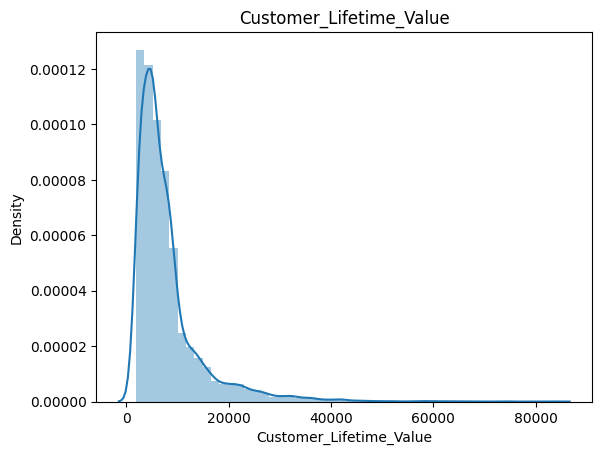

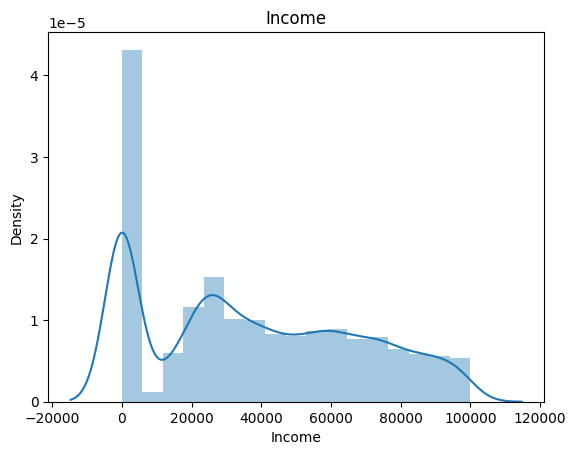

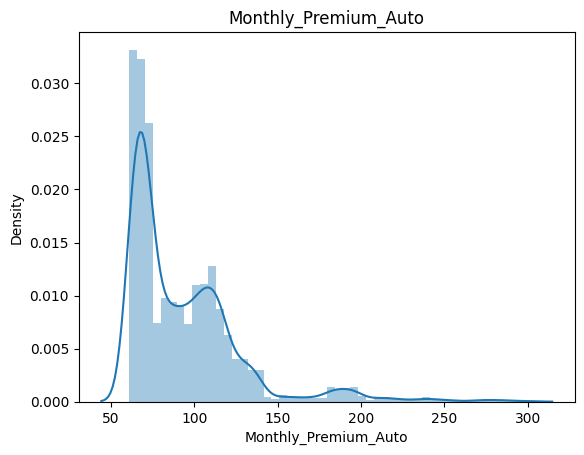

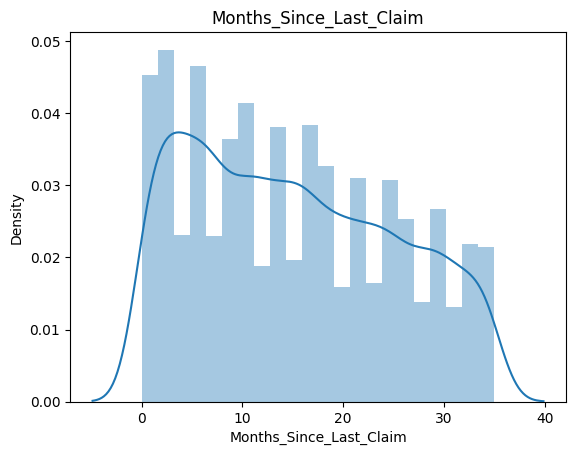

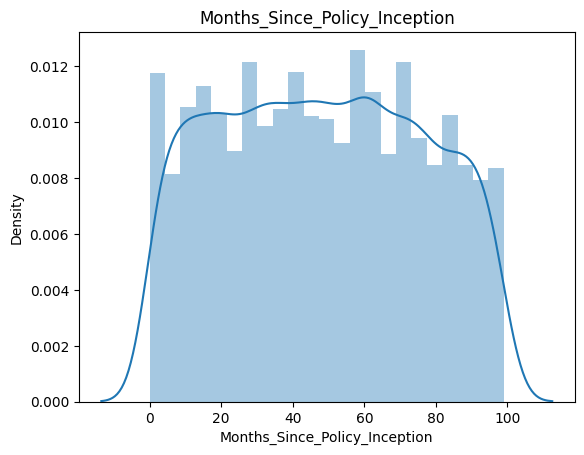

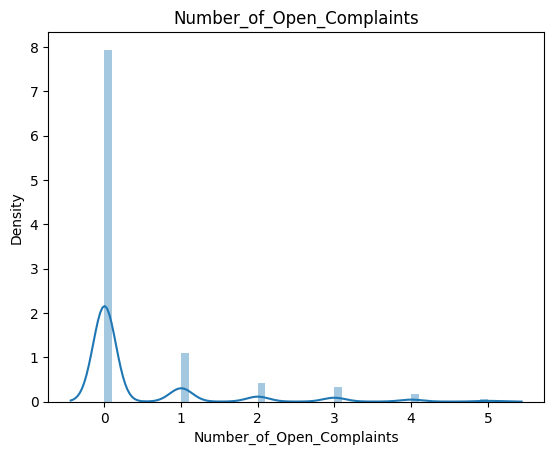

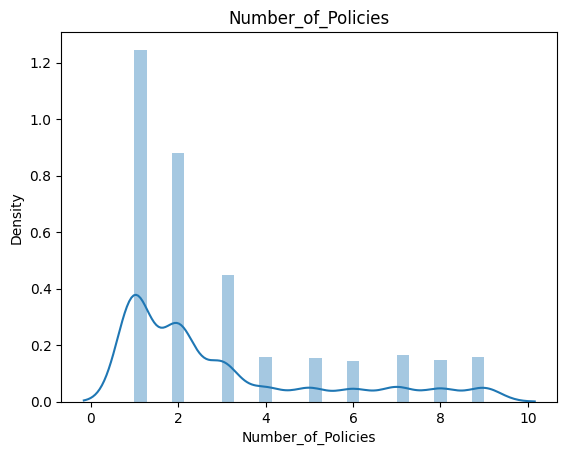

In [12]:
for col in num:
    sns.distplot(num[col])
    plt.title(col)
    plt.show()

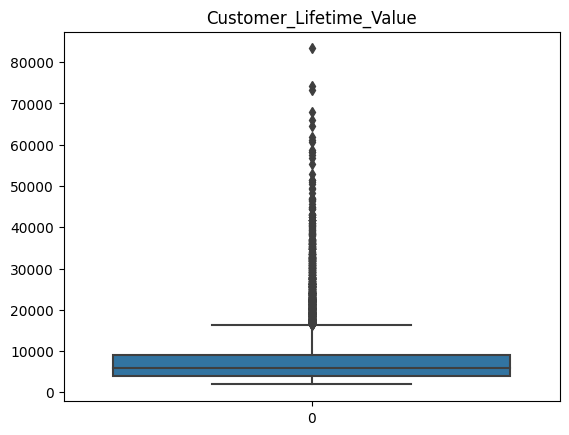

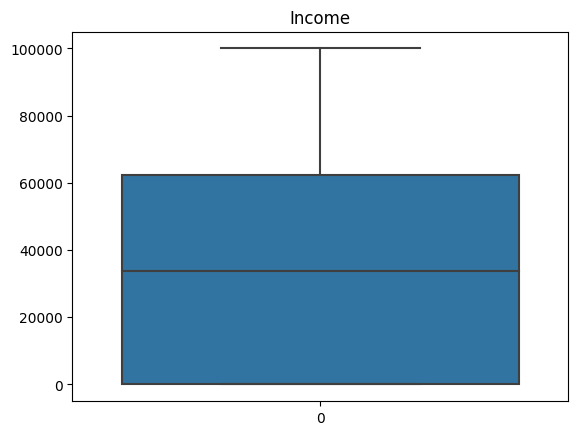

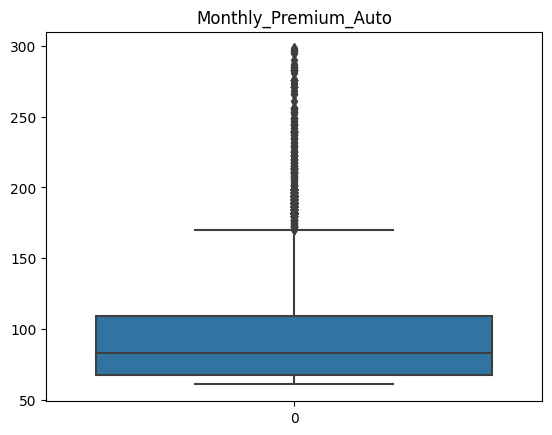

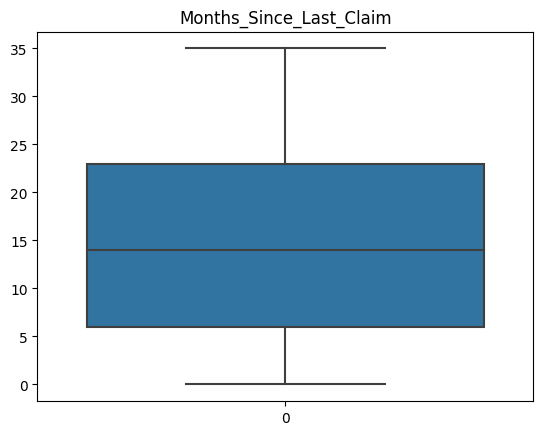

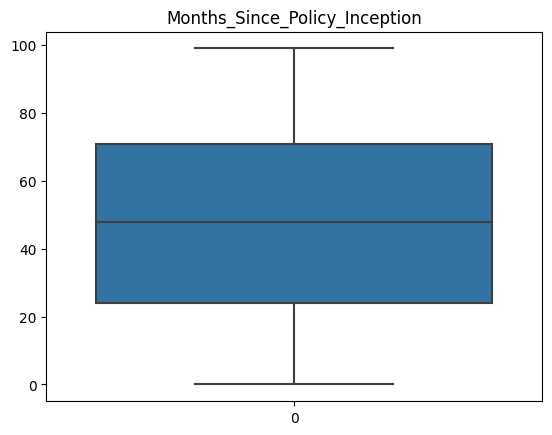

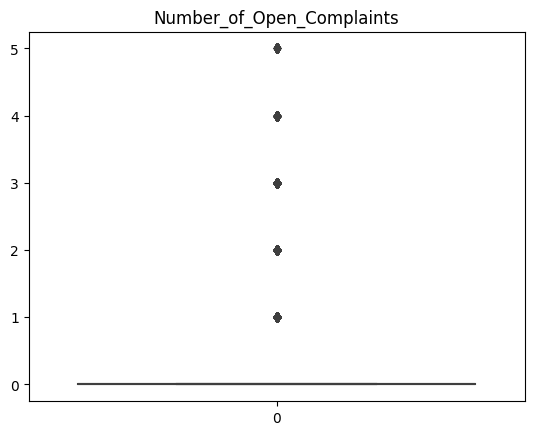

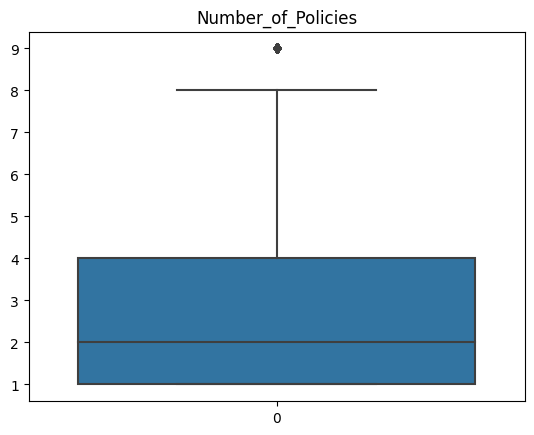

In [13]:
for col in num:
    sns.boxplot(num[col])
    plt.title(col)
    plt.show()

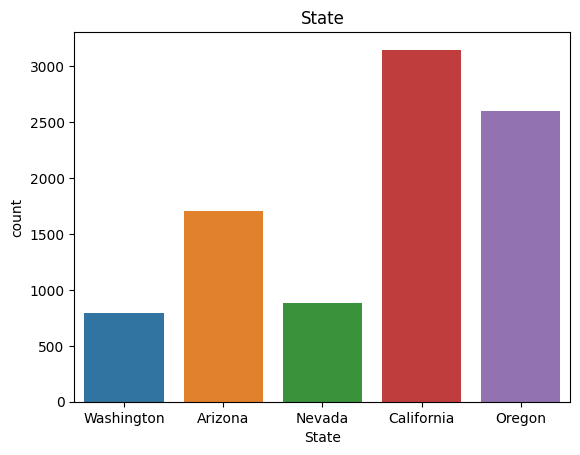

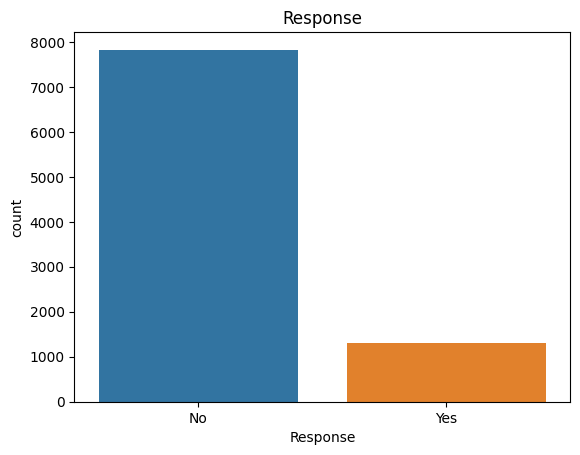

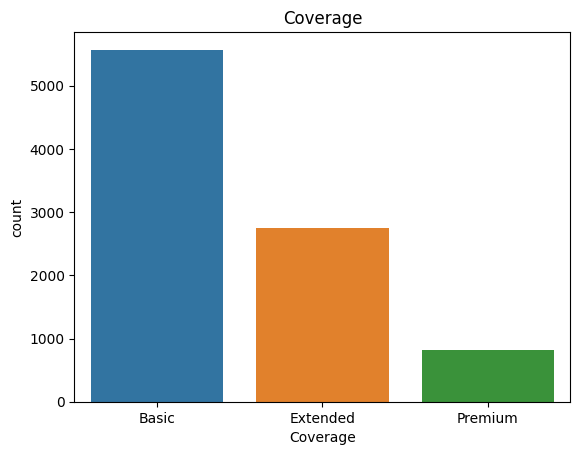

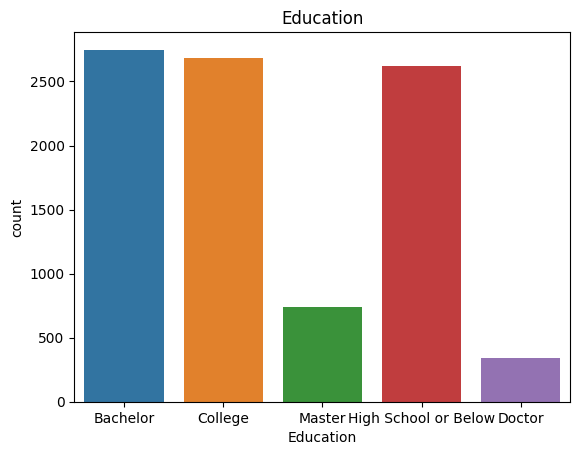

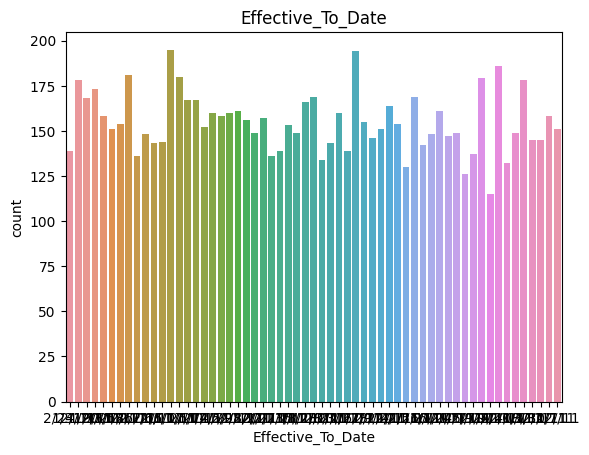

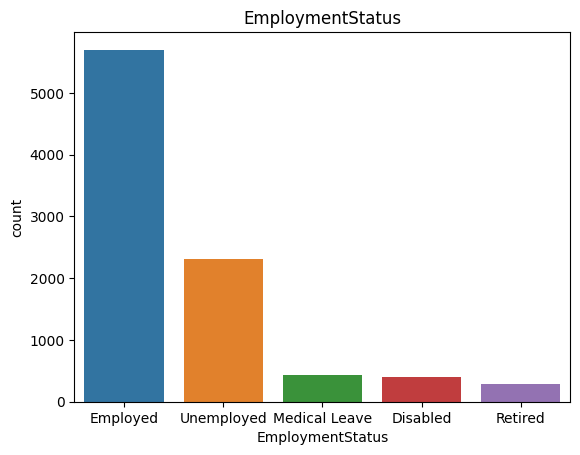

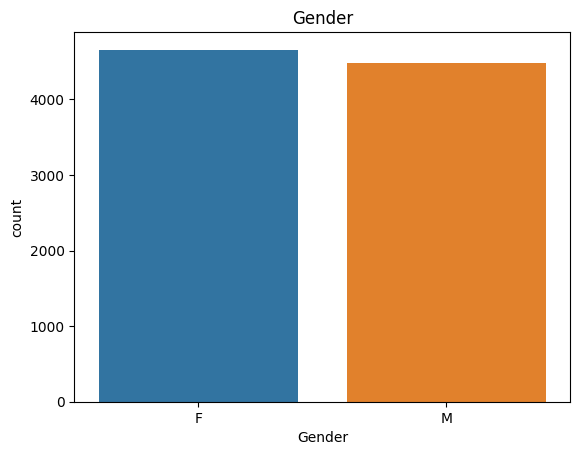

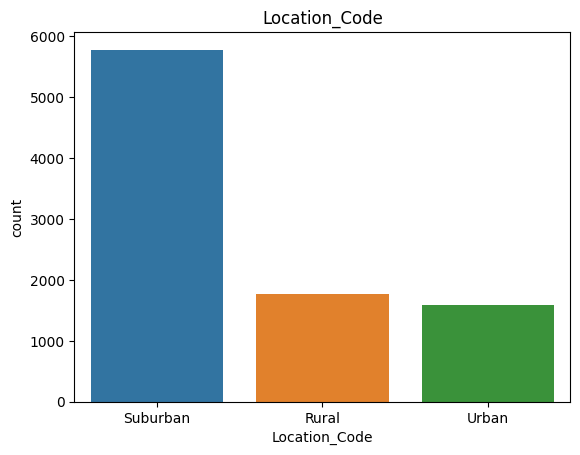

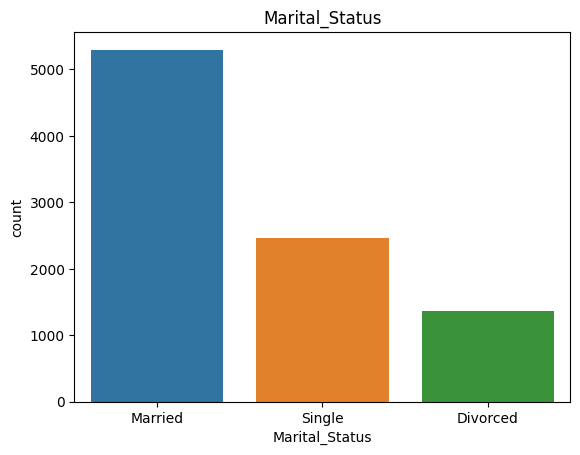

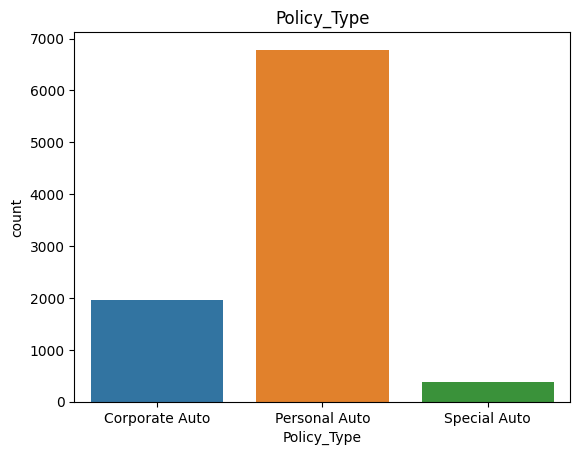

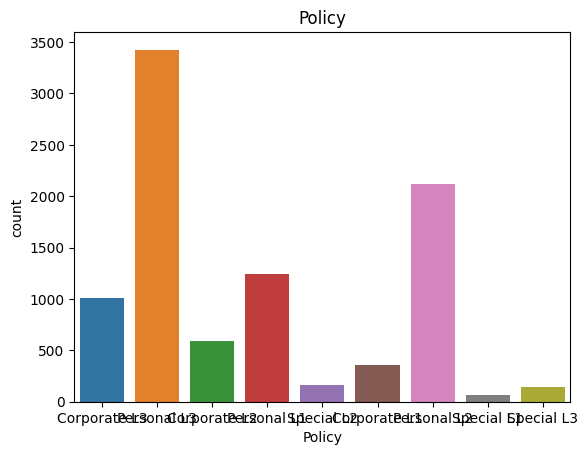

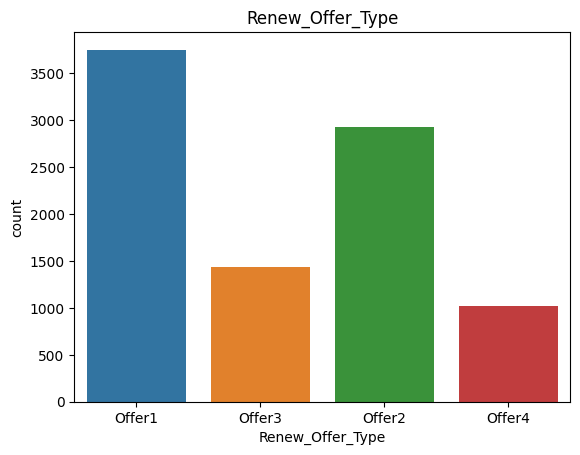

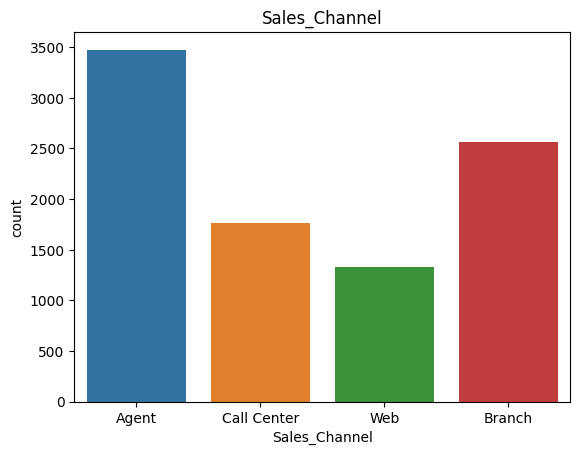

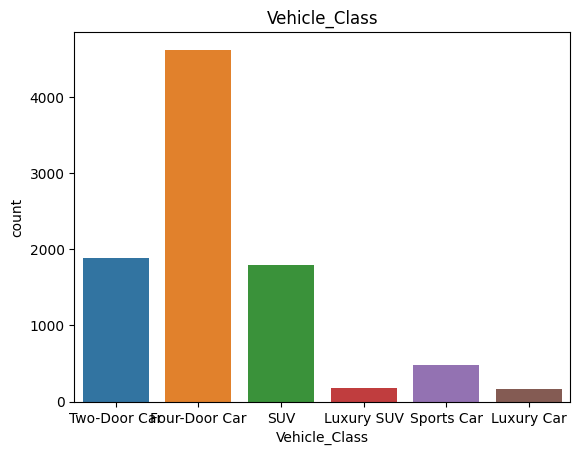

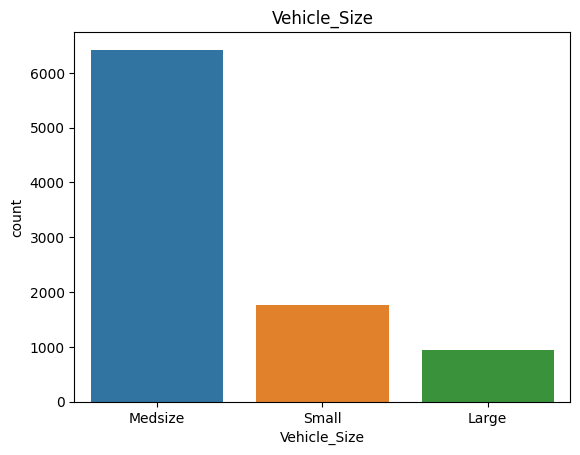

In [14]:
for col in cat:
    sns.countplot(x=cat[col])
    plt.title(col)
    plt.show()

En nuestras graficas Numericas podemos ver que hay algunas categorias que tienen outliers por lo que quitaremos estos datos, principalmente en la columna Customer_Lifetime_Value vemos como la cola derecha de la dist normal es muy larga por los outliers

In [15]:
num['Customer_Lifetime_Value']

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: Customer_Lifetime_Value, Length: 9134, dtype: float64

In [16]:
from scipy.stats import zscore

#z_scores = zscore(num)
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#data = data[filtered_entries]
#data.columns

In [17]:
iqr = np.percentile(num['Customer_Lifetime_Value'],75) - np.percentile(num['Customer_Lifetime_Value'],25)
iqr

4967.915247000001

In [18]:
upper = np.percentile(num['Customer_Lifetime_Value'],75) + 1.5*iqr
lower = np.percentile(num['Customer_Lifetime_Value'],25) - 1.5*iqr

In [19]:
#num = num[(num['Customer_Lifetime_Value']<upper) & (num['Customer_Lifetime_Value']>lower)]
num

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


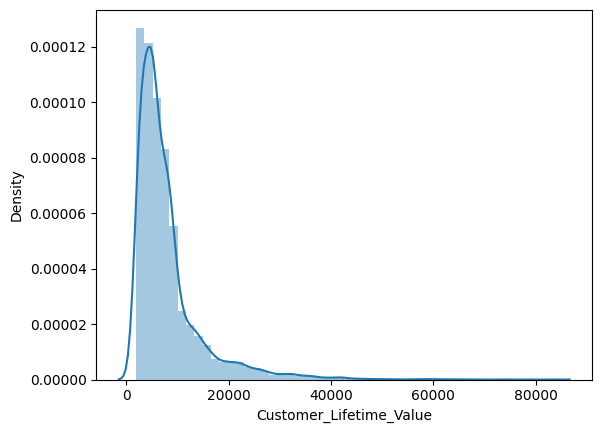

In [20]:
sns.distplot(num['Customer_Lifetime_Value'])
plt.show()

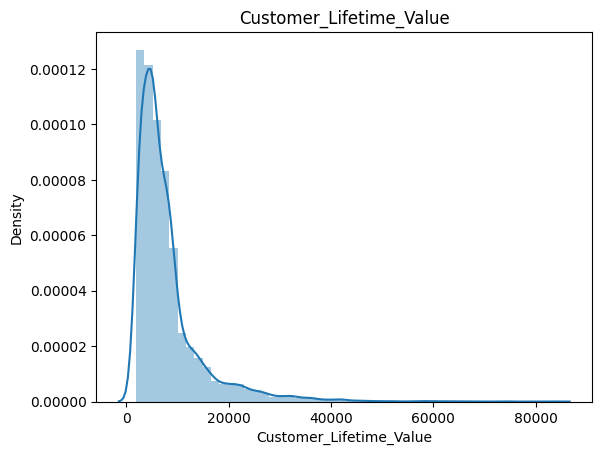

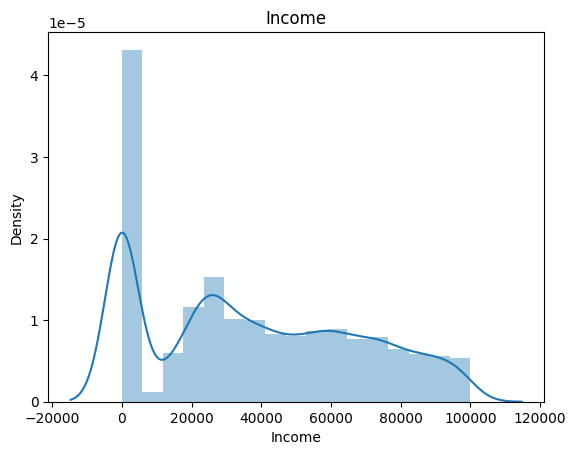

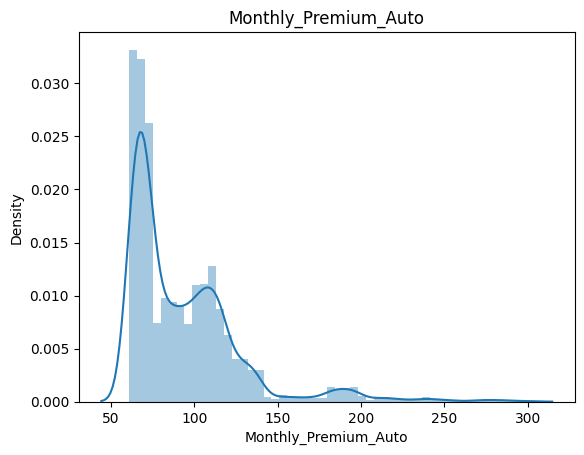

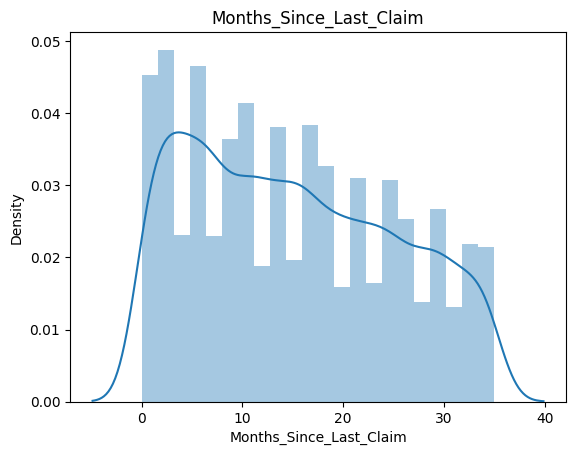

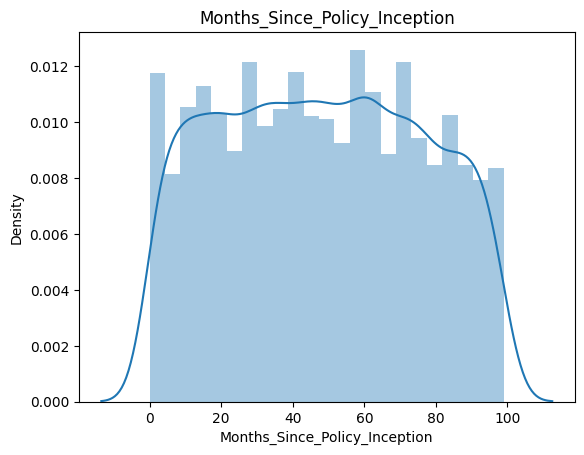

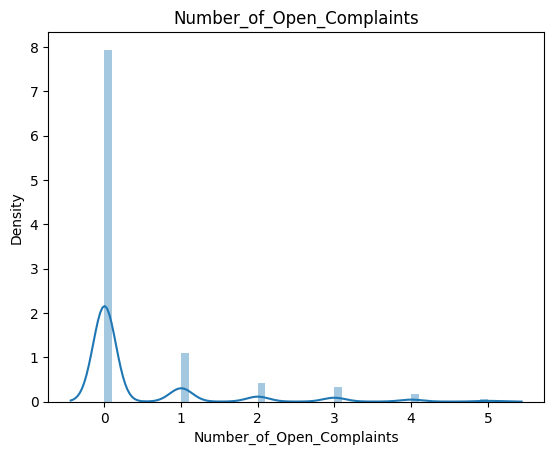

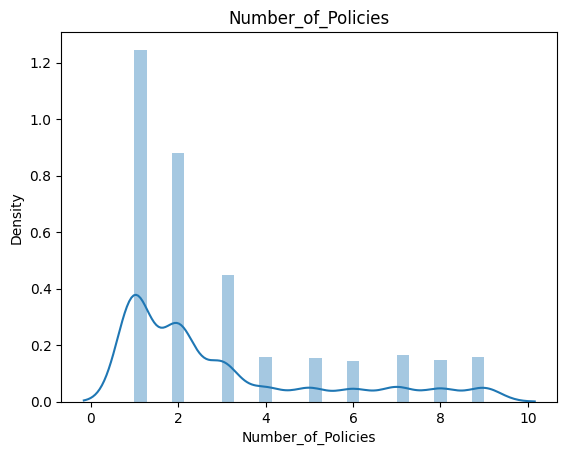

In [21]:
for col in num:
    sns.distplot(num[col])
    plt.title(col)
    plt.show()

Ya que tenemos nuestros datos numericos sin outliers los normalizaremos

In [22]:
transformer = StandardScaler().fit(num)
n_st = transformer.transform(num)
n_st.shape

(9134, 7)

Ahora haremos lo mismo pero para los valores categoricos usando OneHotEncoder

In [23]:
onehot_encoder = OneHotEncoder().fit(cat)
c_st = onehot_encoder.transform(cat).toarray()
c_st.shape

(9134, 116)

Ahora que ya nuestros datos Num y cat estan normalizados unieremos estos dos dataframes a la hora de cortar los outliers se quedaron arrays de diferentes tamanos por lo que se decidio quedarnos con outliers

In [24]:
X = np.concatenate((n_st, c_st), axis=1)
X

array([[-0.76287773,  0.61282744, -0.70392465, ...,  0.        ,
         1.        ,  0.        ],
       [-0.14924546, -1.23961684,  0.02269103, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.71063622,  0.36570978,  0.42959581, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  0.        ,
         1.        ,  0.        ],
       [-0.06993547, -0.51735647,  0.08082028, ...,  1.        ,
         0.        ,  0.        ],
       [-0.78495478, -1.23961684, -0.47140763, ...,  0.        ,
         1.        ,  0.        ]])

In [25]:
y = data['Total_Claim_Amount']
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total_Claim_Amount, Length: 9134, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, y_train)

In [28]:
predict = lm.predict(X_test)


In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [33]:
print('R2:', r2_score(y_test, predict))
print('MSE:', mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predict)))
print('MAE:', mean_absolute_error(y_test, predict))

R2: 0.7736716209334717
MSE: 18068.70310724326
RMSE: 134.4198761613894
MAE: 95.10191247464428


#### Después de limpiar, procesar y modelar los datos, obtuvimos un modelo de regresión lineal que puede predecir el monto total de la reclamación con una precisión razonable. El modelo explica el 74% de la varianza en la variable objetivo (con un puntaje R2 de 0.74)

#### Esto significa que el modelo puede ser utilizado para predecir el monto total de la reclamación basado en la información disponible del cliente. El modelo puede ser mejorado aún más incluyendo características adicionales o probando diferentes algoritmos, pero el modelo actual proporciona un buen punto de partida para predecir los montos de reclamación de los clientes.